In [ ]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data=pd.read_csv("/content/parkinsons_updrs.data.csv")

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5875 entries, 0 to 5874
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   index          5875 non-null   int64  
 1   subject#       5875 non-null   int64  
 2   age            5875 non-null   int64  
 3   sex            5875 non-null   int64  
 4   test_time      5875 non-null   float64
 5   motor_UPDRS    5875 non-null   float64
 6   total_UPDRS    5875 non-null   float64
 7   Jitter(%)      5875 non-null   float64
 8   Jitter(Abs)    5875 non-null   float64
 9   Jitter:RAP     5875 non-null   float64
 10  Jitter:PPQ5    5875 non-null   float64
 11  Jitter:DDP     5875 non-null   float64
 12  Shimmer        5875 non-null   float64
 13  Shimmer(dB)    5875 non-null   float64
 14  Shimmer:APQ3   5875 non-null   float64
 15  Shimmer:APQ5   5875 non-null   float64
 16  Shimmer:APQ11  5875 non-null   float64
 17  Shimmer:DDA    5875 non-null   float64
 18  NHR     

In [ ]:
data.head()

,index,subject#,age,sex,test_time,motor_UPDRS,total_UPDRS,Jitter(%),Jitter(Abs),Jitter:RAP,...,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE
0,0,1,72,0,5.6431,28.199,34.398,0.00662,0.000034,0.00401,...,0.230,0.01438,0.01309,0.01662,0.04314,0.014290,21.640,0.41888,0.54842,0.16006
1,1,1,72,0,12.6660,28.447,34.894,0.00300,0.000017,0.00132,...,0.179,0.00994,0.01072,0.01689,0.02982,0.011112,27.183,0.43493,0.56477,0.10810
2,2,1,72,0,19.6810,28.695,35.389,0.00481,0.000025,0.00205,...,0.181,0.00734,0.00844,0.01458,0.02202,0.020220,23.047,0.46222,0.54405,0.21014
3,3,1,72,0,25.6470,28.905,35.810,0.00528,0.000027,0.00191,...,0.327,0.01106,0.01265,0.01963,0.03317,0.027837,24.445,0.48730,0.57794,0.33277
4,4,1,72,0,33.6420,29.187,36.375,0.00335,0.000020,0.00093,...,0.176,0.00679,0.00929,0.01819,0.02036,0.011625,26.126,0.47188,0.56122,0.19361


In [ ]:
data.isnull().sum()

index            0
subject#         0
age              0
sex              0
test_time        0
motor_UPDRS      0
total_UPDRS      0
Jitter(%)        0
Jitter(Abs)      0
Jitter:RAP       0
Jitter:PPQ5      0
Jitter:DDP       0
Shimmer          0
Shimmer(dB)      0
Shimmer:APQ3     0
Shimmer:APQ5     0
Shimmer:APQ11    0
Shimmer:DDA      0
NHR              0
HNR              0
RPDE             0
DFA              0
PPE              0
dtype: int64

In [ ]:
data=data.loc[:,["index","subject#","age","sex","test_time","motor_UPDRS","total_UPDRS","Jitter(%)","Shimmer","NHR","HNR","RPDE","DFA","PPE"]]

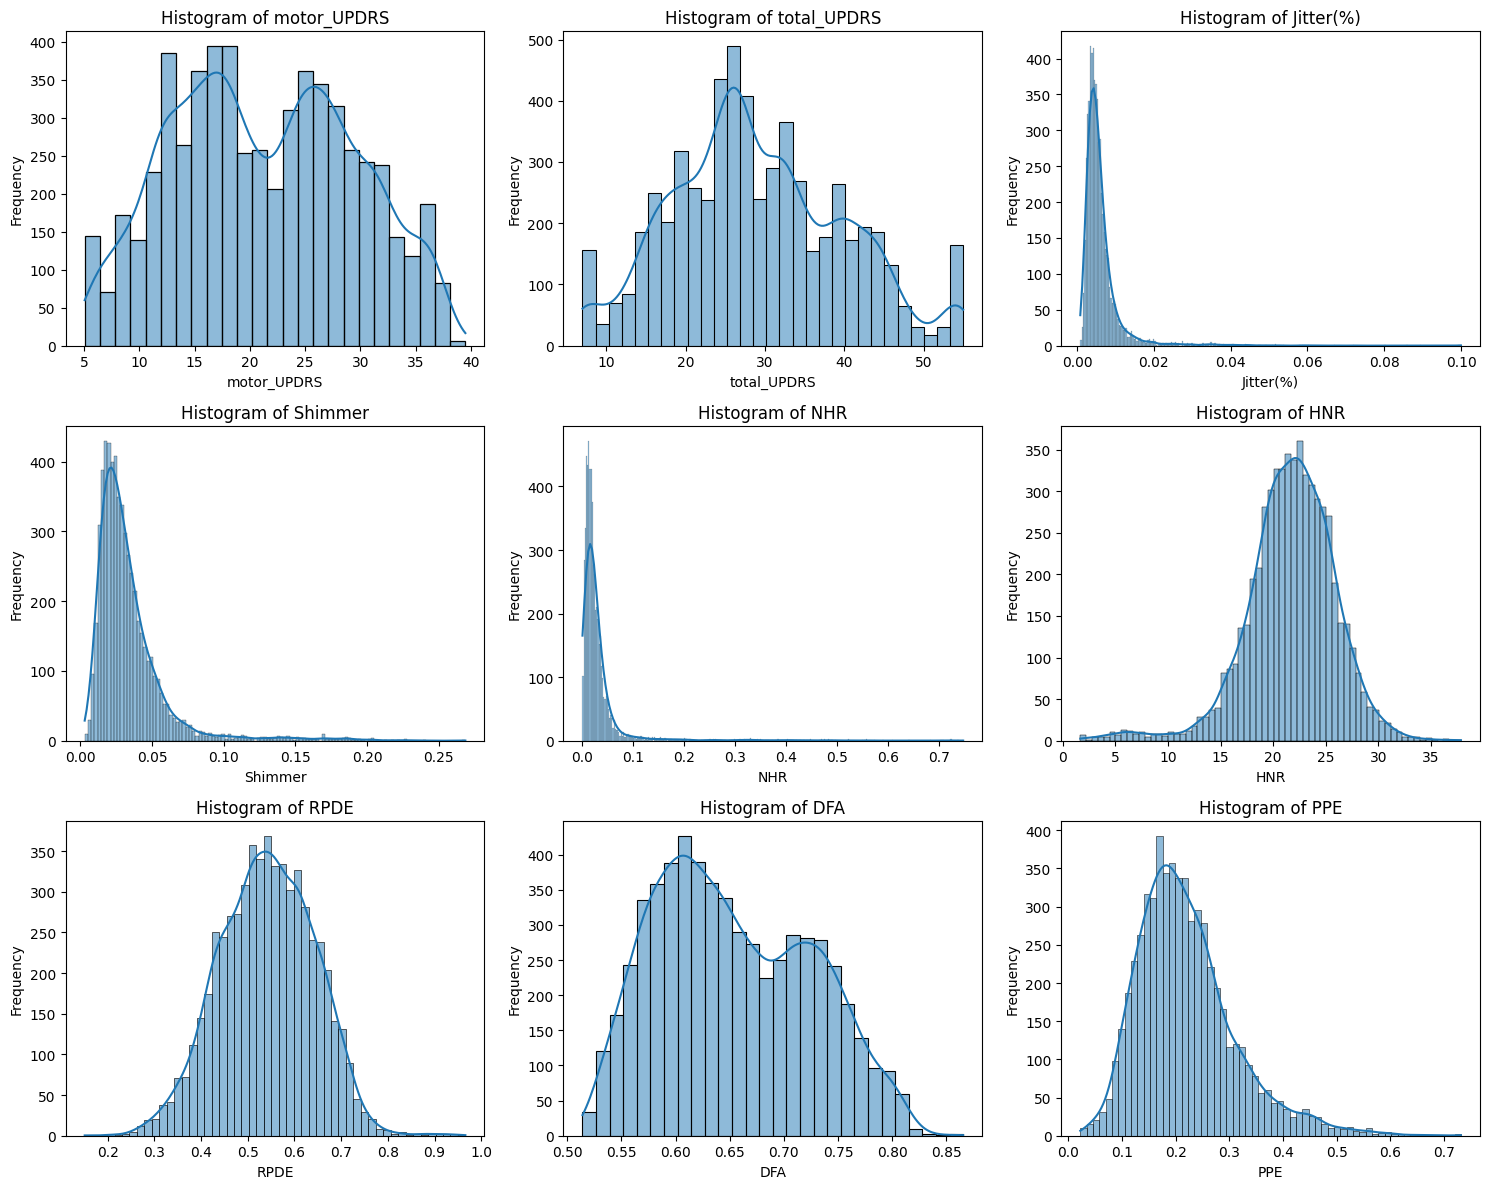

In [ ]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 12))

axes = axes.flatten()

columns_to_visualize = ["motor_UPDRS", "total_UPDRS", "Jitter(%)", "Shimmer", "NHR", "HNR", "RPDE", "DFA", "PPE"]

for i, column in enumerate(columns_to_visualize):
    sns.histplot(data[column], ax=axes[i], kde=True)
    axes[i].set_title(f'Histogram of {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()


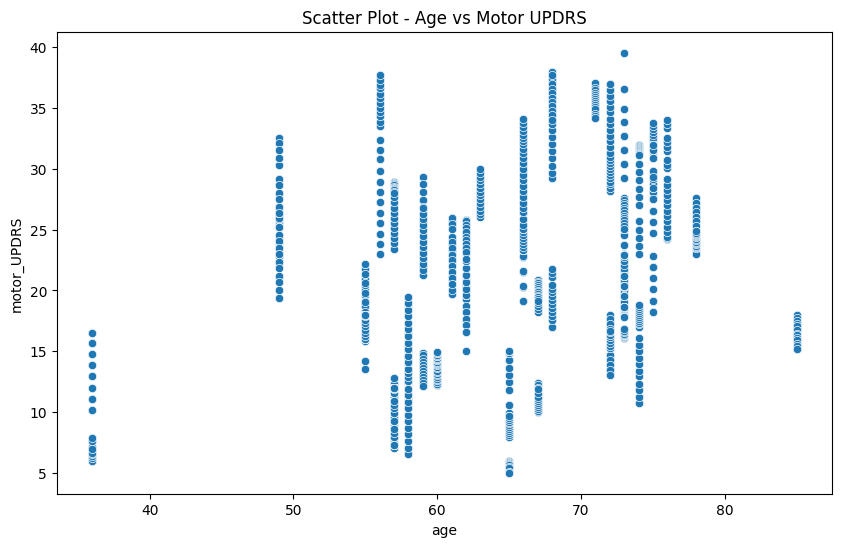

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='age', y='motor_UPDRS', data=data)
plt.title('Scatter Plot - Age vs Motor UPDRS')
plt.show()

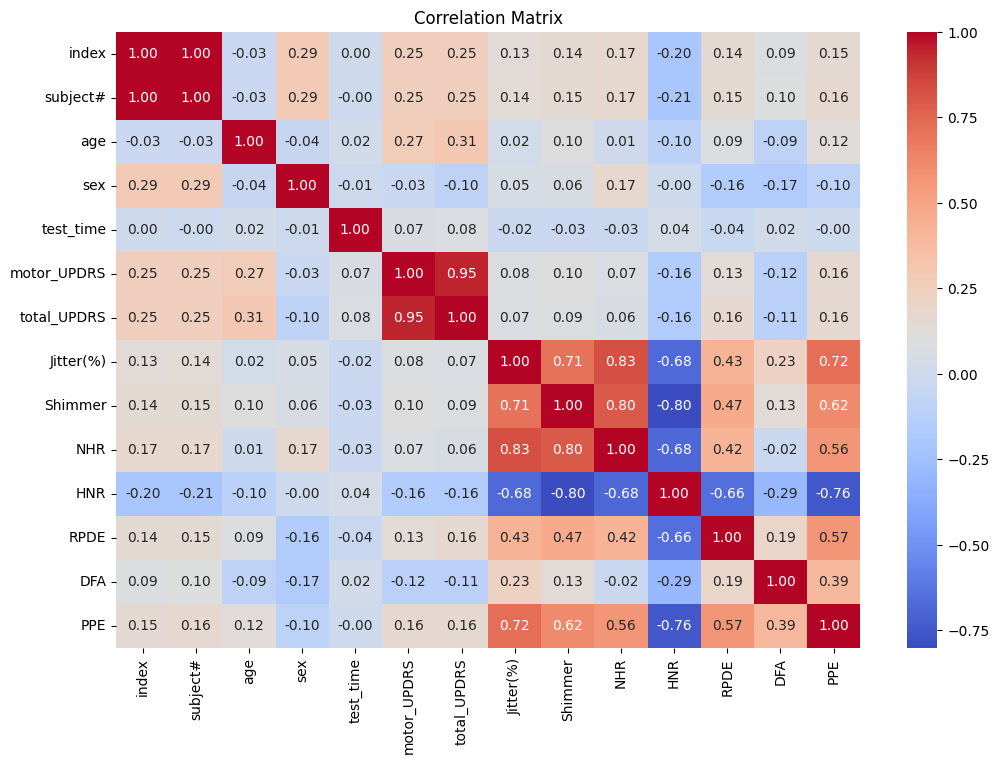

In [ ]:
correlation_matrix = data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

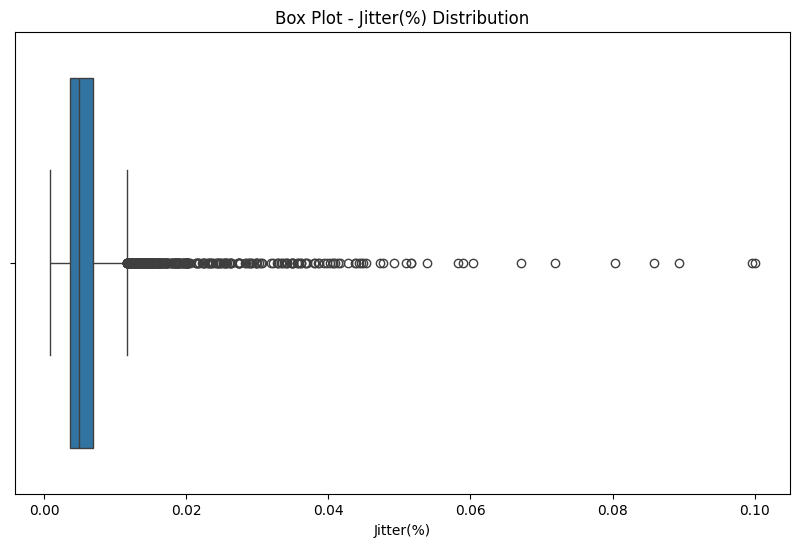

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Jitter(%)', data=data)
plt.title('Box Plot - Jitter(%) Distribution')
plt.xlabel('Jitter(%)')
plt.show()

In [ ]:
correlation_coefficient = data['motor_UPDRS'].corr(data['total_UPDRS'])

print(f"Pearson correlation coefficient between motor_UPDRS and total_UPDRS: {correlation_coefficient:.2f}")


Pearson correlation coefficient between motor_UPDRS and total_UPDRS: 0.95


In [ ]:
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers_removed = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return outliers_removed

columns_to_check = ["motor_UPDRS", "total_UPDRS", "Jitter(%)", "Shimmer", "NHR", "HNR", "RPDE", "DFA", "PPE"]

for col in columns_to_check:
    data_after = remove_outliers_iqr(data, col)

In [ ]:
from scipy.stats import zscore
import numpy as np



z_scores = zscore(data_after)
abs_z_scores = np.abs(z_scores)
outliers = (abs_z_scores > 3).all(axis=1)
outlier_values = data_after[outliers]
print(outlier_values)

Empty DataFrame
Columns: [index, subject#, age, sex, test_time, motor_UPDRS, total_UPDRS, Jitter(%), Shimmer, NHR, HNR, RPDE, DFA, PPE]
Index: []


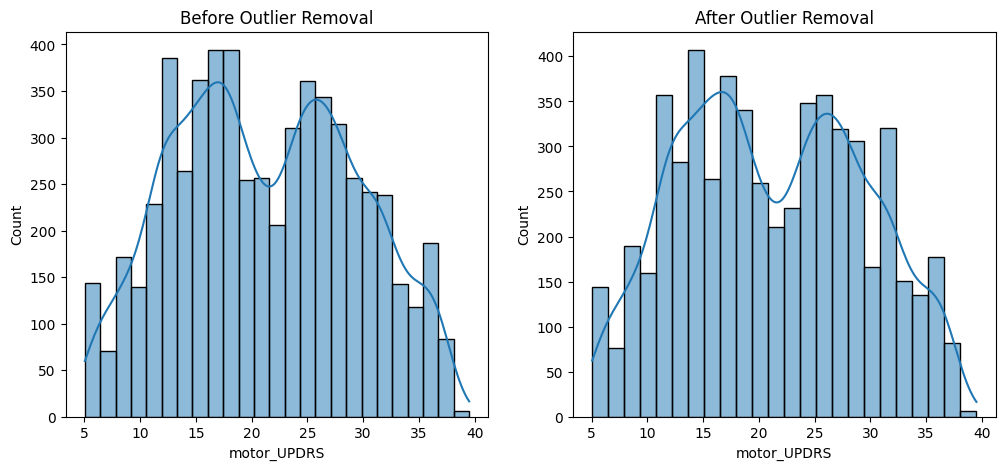

In [ ]:
def plot_histograms(data_before, data_after, column):
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))
    sns.histplot(data_before[column], ax=axes[0], kde=True)
    axes[0].set_title('Before Outlier Removal')
    sns.histplot(data_after[column], ax=axes[1], kde=True)
    axes[1].set_title('After Outlier Removal')
    plt.show()
plot_histograms(data, data_after, "motor_UPDRS")

In [ ]:
def compare_summary_statistics(data_before, data_after, column):
    summary_stats_before = data_before[column].describe()
    summary_stats_after = data_after[column].describe()
    print("Summary Statistics Before Outlier Removal:\n", summary_stats_before)
    print("\nSummary Statistics After Outlier Removal:\n", summary_stats_after)
compare_summary_statistics(data, data_after,"motor_UPDRS")

Summary Statistics Before Outlier Removal:
 count    5875.000000
mean       21.296229
std         8.129282
min         5.037700
25%        15.000000
50%        20.871000
75%        27.596500
max        39.511000
Name: motor_UPDRS, dtype: float64

Summary Statistics After Outlier Removal:
 count    5669.000000
mean       21.194595
std         8.180160
min         5.037700
25%        14.731000
50%        20.627000
75%        27.612000
max        39.511000
Name: motor_UPDRS, dtype: float64
